In [1]:
import matplotlib as mpl
import met_brewer
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from data_loading import (load_valid_isoform_clones,
                          load_isoform_and_paralog_y2h_data,
                          load_y1h_pdi_data,
                          load_m1h_activation_data,
                          load_annotated_gencode_tfs,
                          load_annotated_6k_collection)

from plotting import PAPER_PRESET, PAPER_FONTSIZE, nice_boxplot, nice_violinplot, mimic_r_boxplot


%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['figure.autolayout'] = False

In [2]:
sns.set(**PAPER_PRESET)
fontsize = PAPER_FONTSIZE

In [3]:
np.random.seed(2023)

## 1. load clone collection and gencode

In [4]:
genc_tfs = load_annotated_gencode_tfs()

reading from cache


In [5]:
clone_tfs = load_annotated_6k_collection()

reading from cache


## 2. loop through gencode and make df of splicing cats

In [6]:
alt_n = 0
alt_c = 0
alt_int = 0
alt_5ss = 0
alt_3ss = 0
exon_sk = 0
mut_ex = 0
intron_ret = 0
tot = 0

for tf in genc_tfs.keys():
    gene = genc_tfs[tf]
    ref = gene.reference_isoform.name
    alts = [x.name for x in gene.alternative_isoforms]
    for alt in alts:
        splicing_cats = gene.splicing_categories(ref, alt)
        
        if splicing_cats['alternative N-terminal']:
            alt_n += 1
        if splicing_cats['alternative C-terminal']:
            alt_c += 1
        if splicing_cats['alternative internal exon']:
            alt_int += 1
        if splicing_cats['alternative 5\' splice site']:
            alt_5ss += 1
        if splicing_cats['alternative 3\' splice site']:
            alt_3ss += 1
        if splicing_cats['exon skipping']:
            exon_sk += 1
        if splicing_cats['mutually exclusive exons']:
            mut_ex += 1
        if splicing_cats['intron retention']:
            intron_ret += 1
        
        tot += 1

genc_df = pd.DataFrame.from_dict({"alt. N-terminal": [alt_n], "alt. C-terminal": [alt_c],
                                  "alt. internal exon": [alt_int], "alt. 5' splice site": [alt_5ss],
                                  "alt. 3' splice site": [alt_3ss], "exon skipping": [exon_sk],
                                  "mutually exclusive exons": [mut_ex], "intron retention": [intron_ret],
                                  "total": tot})
genc_df.index = ["gencode"]
genc_df

,alt. N-terminal,alt. C-terminal,alt. internal exon,alt. 5' splice site,alt. 3' splice site,exon skipping,mutually exclusive exons,intron retention,total
gencode,1046,1071,430,686,879,330,26,72,1855


## 3. loop through 6k and do the same thing

In [7]:
alt_n = 0
alt_c = 0
alt_int = 0
alt_5ss = 0
alt_3ss = 0
exon_sk = 0
mut_ex = 0
intron_ret = 0
tot = 0

for tf in clone_tfs.keys():
    gene = clone_tfs[tf]
    ref = gene.cloned_reference_isoform.name
    alts = [x.name for x in gene.cloned_isoforms if x.name != ref]
    for alt in alts:
        splicing_cats = gene.splicing_categories(ref, alt)
        
        if splicing_cats['alternative N-terminal']:
            alt_n += 1
        if splicing_cats['alternative C-terminal']:
            alt_c += 1
        if splicing_cats['alternative internal exon']:
            alt_int += 1
        if splicing_cats['alternative 5\' splice site']:
            alt_5ss += 1
        if splicing_cats['alternative 3\' splice site']:
            alt_3ss += 1
        if splicing_cats['exon skipping']:
            exon_sk += 1
        if splicing_cats['mutually exclusive exons']:
            mut_ex += 1
        if splicing_cats['intron retention']:
            intron_ret += 1
        
        tot += 1

clone_df = pd.DataFrame.from_dict({"alt. N-terminal": [alt_n], "alt. C-terminal": [alt_c],
                                  "alt. internal exon": [alt_int], "alt. 5' splice site": [alt_5ss],
                                  "alt. 3' splice site": [alt_3ss], "exon skipping": [exon_sk],
                                  "mutually exclusive exons": [mut_ex], "intron retention": [intron_ret],
                                  "total": tot})
clone_df.index = ["TFIso1.0"]
clone_df

,alt. N-terminal,alt. C-terminal,alt. internal exon,alt. 5' splice site,alt. 3' splice site,exon skipping,mutually exclusive exons,intron retention,total
TFIso1.0,169,198,136,179,218,116,5,14,447


## 4. now novels only

In [8]:
alt_n = 0
alt_c = 0
alt_int = 0
alt_5ss = 0
alt_3ss = 0
exon_sk = 0
mut_ex = 0
intron_ret = 0
tot = 0

for tf in clone_tfs.keys():
    gene = clone_tfs[tf]
    ref = gene.cloned_reference_isoform.name
    novels = [x.name for x in gene.cloned_isoforms if x.is_novel_isoform()]
    for novel in novels:
        splicing_cats = gene.splicing_categories(ref, novel)
        
        if splicing_cats['alternative N-terminal']:
            alt_n += 1
        if splicing_cats['alternative C-terminal']:
            alt_c += 1
        if splicing_cats['alternative internal exon']:
            alt_int += 1
        if splicing_cats['alternative 5\' splice site']:
            alt_5ss += 1
        if splicing_cats['alternative 3\' splice site']:
            alt_3ss += 1
        if splicing_cats['exon skipping']:
            exon_sk += 1
        if splicing_cats['mutually exclusive exons']:
            mut_ex += 1
        if splicing_cats['intron retention']:
            intron_ret += 1
        
        tot += 1

novel_df = pd.DataFrame.from_dict({"alt. N-terminal": [alt_n], "alt. C-terminal": [alt_c],
                                  "alt. internal exon": [alt_int], "alt. 5' splice site": [alt_5ss],
                                  "alt. 3' splice site": [alt_3ss], "exon skipping": [exon_sk],
                                  "mutually exclusive exons": [mut_ex], "intron retention": [intron_ret],
                                  "total": tot})
novel_df.index = ["TFIso1.0 - novel"]
novel_df

,alt. N-terminal,alt. C-terminal,alt. internal exon,alt. 5' splice site,alt. 3' splice site,exon skipping,mutually exclusive exons,intron retention,total
TFIso1.0 - novel,47,70,81,71,103,69,4,7,191


## 5. make plot

In [9]:
splicing = genc_df.append(clone_df).append(novel_df)
splicing_tot = splicing["total"]
splicing = splicing.drop("total", axis=1)
splicing_perc = splicing.divide(splicing_tot, axis='rows').reset_index()
splicing_perc

,index,alt. N-terminal,alt. C-terminal,alt. internal exon,alt. 5' splice site,alt. 3' splice site,exon skipping,mutually exclusive exons,intron retention
0,gencode,0.563881,0.577358,0.231806,0.369811,0.473854,0.177898,0.014016,0.038814
1,TFIso1.0,0.378076,0.442953,0.304251,0.400447,0.487696,0.259508,0.011186,0.031320
2,TFIso1.0 - novel,0.246073,0.366492,0.424084,0.371728,0.539267,0.361257,0.020942,0.036649


In [10]:
splicing_perc_melt = pd.melt(splicing_perc, id_vars="index")

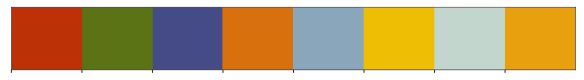

In [11]:
colors = met_brewer.met_brew(name="VanGogh2")
sns.palplot(colors)

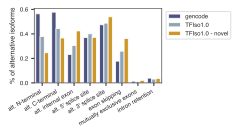

In [12]:
fig = plt.figure(figsize=(3.2, 1.75))

ax = sns.barplot(data=splicing_perc_melt, x="variable", y="value", hue="index", palette={"gencode": colors[2],
                                                                                         "TFIso1.0": colors[4],
                                                                                         "TFIso1.0 - novel": colors[7]})
ax.set_xlabel("")
ax.set_xticklabels(list(splicing_perc_melt["variable"].unique()), ha="right", va="top", rotation=30)
ax.set_ylabel("% of alternative isoforms")

plt.legend(loc=2, bbox_to_anchor=(1.01, 1))

fig.savefig("../figures/splicing_cats.pdf", dpi="figure", bbox_inches="tight")